In [1]:
# LIBRARIES:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pylab
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingClassifier
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import iplot
from plotly.offline import plot
import itertools
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np.set_printoptions(suppress=True)

%matplotlib inline
init_notebook_mode(connected=True)

# *EXPLORING DATA :*

In [2]:
# OUTPUT this clean dataset as csv :

cleanedComputedData = pd.read_csv(r"Cleaned AND computed Datasets\Cleaned_Computed_Dataset_Level_1.csv")
cleanedComputedData.head()

,Job Experience in years after undergard,MS university name,No of research papers published during undergrad,Number of internships during undergrad,Undergrad college Tier,Whether Got Job within one year of MS completion,Whether Job after Undergrad 1/0,World ranking of university MS,entire education detail,entire experience detail,linkedin url,student name,student summary,undergrad college name,Undergrad CGPA refined
0,0.0,Georgia Institute of Technology,0,0,2.0,1.0,0.0,34.0,"{ ""education_1"" : { ""InstituteName"" : ""Georgia...","{ ""experience_1"" : ""Company Name Amazon Total ...",https://www.linkedin.com/in/saurabh-shah-22b0b...,Saurabh Shah,Software Development Manager at Amazon,University of Mumbai,8.4
1,0.0,University of Wisconsin-Madison,0,2,1.0,1.0,0.0,44.0,"{ ""education_1"" : { ""InstituteName"" : ""Univers...","{ ""experience_1"" : ""Research Assistant Company...",https://www.linkedin.com/in/somyarora/,NaN,NaN,"Indian Institute of Technology, Delhi",9.1
2,0.0,"University of California, Santa Barbara",1,0,1.0,1.0,0.0,37.0,"{ ""education_1"" : { ""InstituteName"" : ""Univers...","{ ""experience_1"" : ""Engineering Manager Compan...",https://www.linkedin.com/in/rajesh-kumar-ucsb/,Rajesh Kumar,Engineering Manager at Google,Indian Institute of Technology (Banaras Hindu ...,8.9
3,1.0,Carnegie Mellon University,0,3,3.0,1.0,1.0,24.0,"{ ""education_1"" : { ""InstituteName"" : ""Carnegi...","{ ""experience_1"" : ""Company Name Oracle Total ...",https://www.linkedin.com/in/anishacherodian/,Anisha Cherodian,Member Of Technical Staff at Oracle,KJ Somaiya College of Engineering,8.2
4,0.0,Carnegie Mellon University,5,4,1.0,1.0,0.0,24.0,"{ ""education_1"" : { ""InstituteName"" : ""Carnegi...","{ ""experience_1"" : ""Software Engineer - ML/AI ...",https://www.linkedin.com/in/shivani-poddar/,Shivani Poddar,Software Engineer - ML/AI at Facebook,International Institute of Information Technology,8.9


In [3]:
cleanedComputedData.columns

Index(['Job Experience in years after undergard', 'MS university name',
       'No of research papers published during undergrad',
       'Number of internships during undergrad', 'Undergrad college Tier',
       'Whether Got Job within one year of MS completion',
       'Whether Job after Undergrad 1/0', 'World ranking of university MS',
       'entire education detail', 'entire experience detail', 'linkedin url',
       'student name', 'student summary', 'undergrad college name',
       'Undergrad CGPA refined'],
      dtype='object')

## UNIVARIATE ANALYSIS :

> <h3>+ Job Experience in years after undergard,</h3> 
> <h3>+ No of research papers published during undergrad,</h3> 
> <h3>+ Undergrad CGPA refined</h3>
> <h3>+ Number of internships during undergrad, </h3>

## *Distribution :*

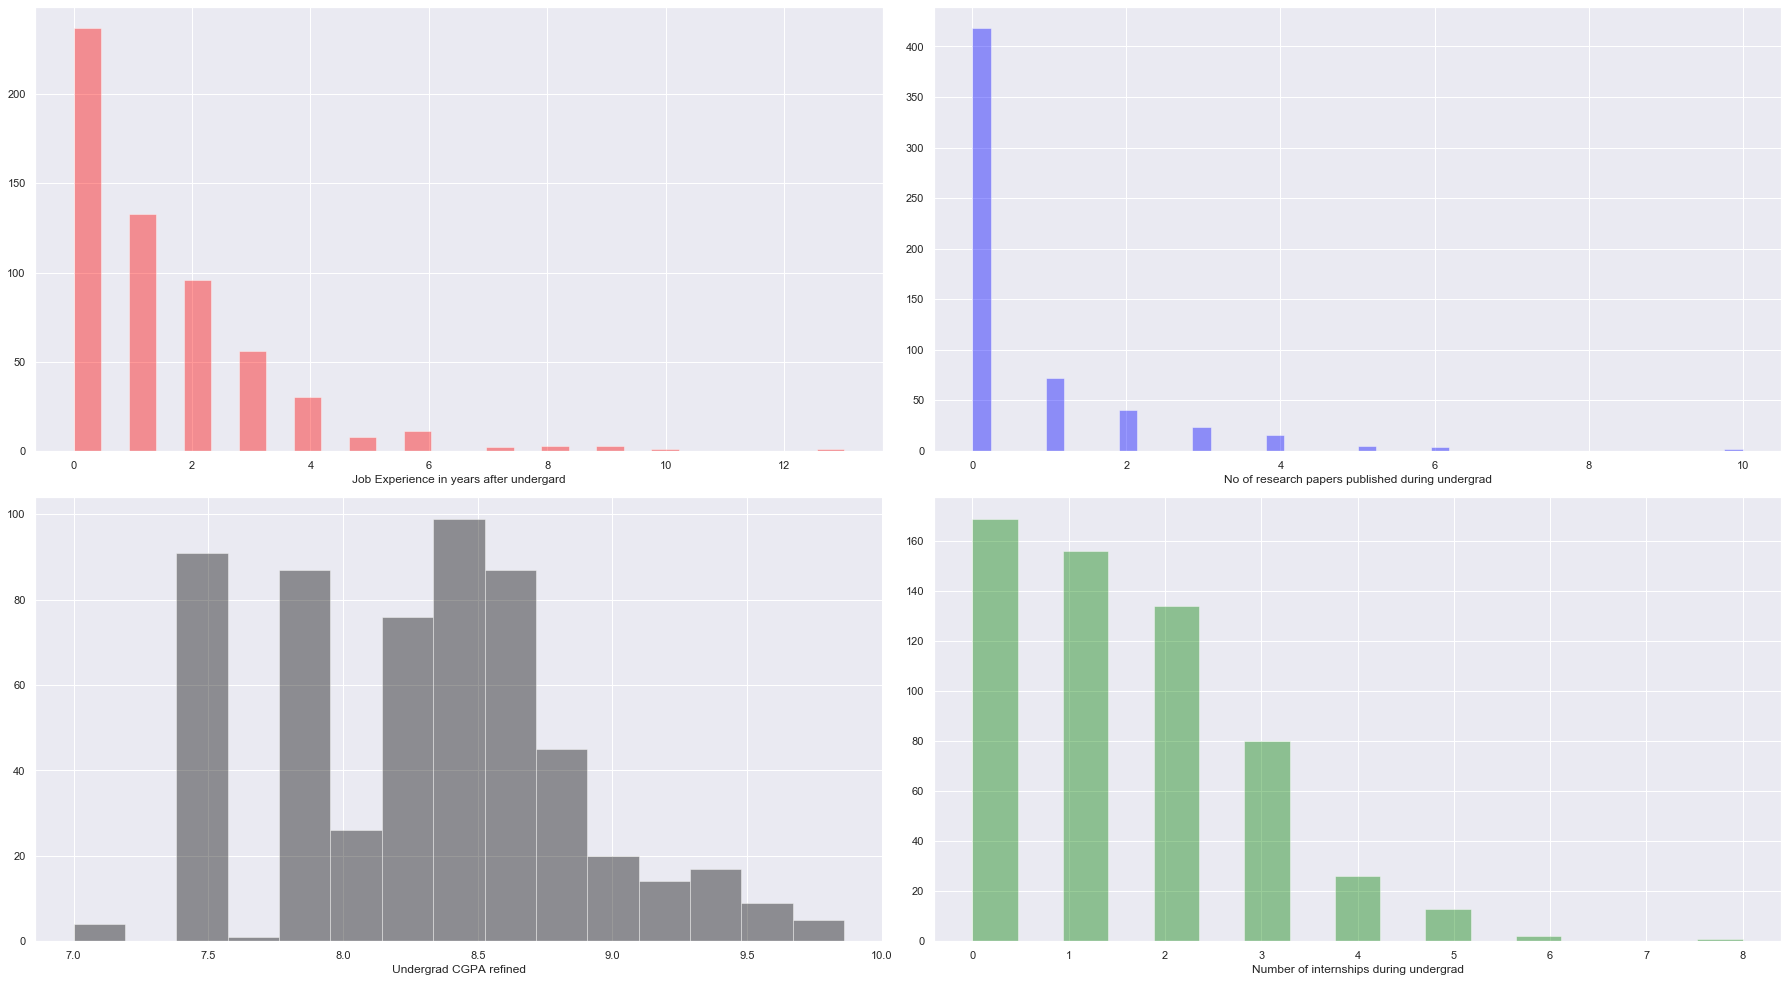

In [4]:
fig = plt.figure(figsize=(25, 15))
sns.set(style="darkgrid", palette="deep")

plt.subplot(2, 2, 1)
sns.distplot(cleanedComputedData['Job Experience in years after undergard'], color='red', kde=False)

plt.subplot(2, 2, 2)
sns.distplot(cleanedComputedData['No of research papers published during undergrad'], color='blue', kde=False)

plt.subplot(2, 2, 3)
sns.distplot(cleanedComputedData['Undergrad CGPA refined'], kde=False, color='black')

plt.subplot(2, 2, 4)
sns.distplot(cleanedComputedData['Number of internships during undergrad'], kde=False, color='green')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## *Density Estimation :*

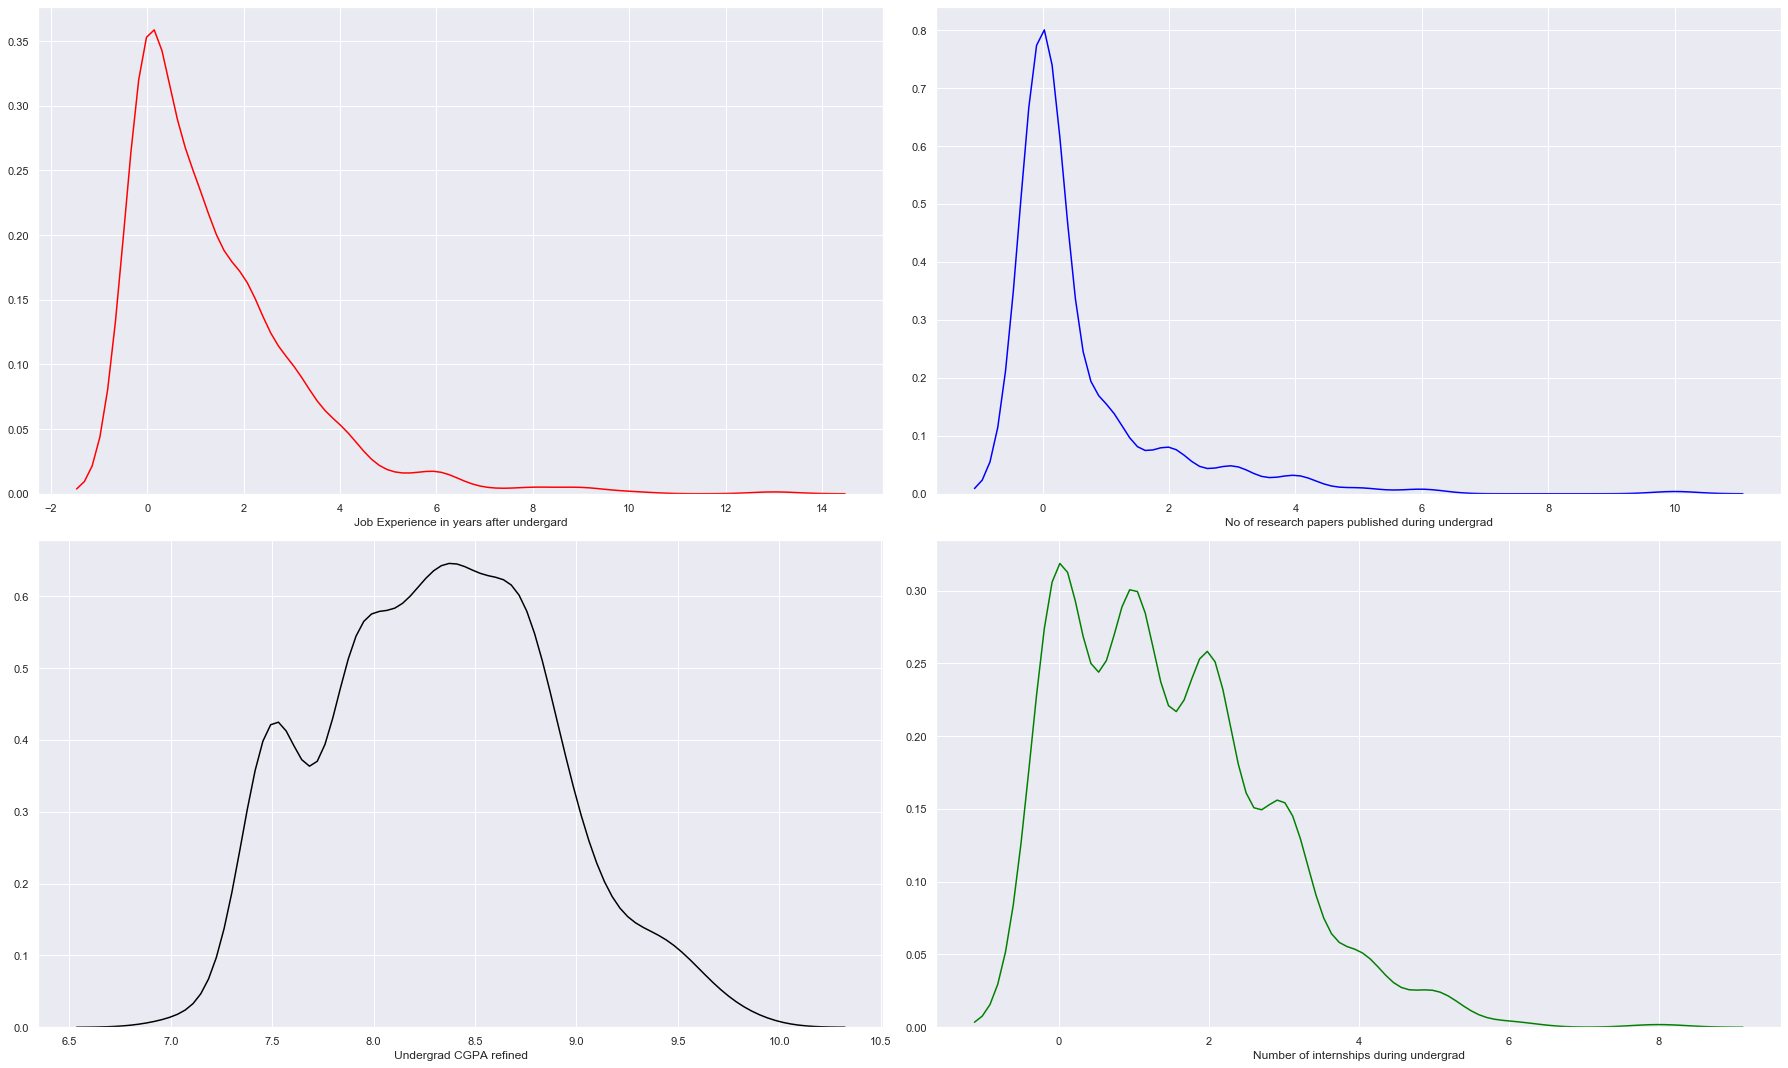

In [5]:
fig = plt.figure(figsize=(25, 15))
sns.set(style="darkgrid", palette="deep")

plt.subplot(2, 2, 1)
sns.distplot(cleanedComputedData['Job Experience in years after undergard'], color='red', kde=True, hist=False)

plt.subplot(2, 2, 2)
sns.distplot(cleanedComputedData['No of research papers published during undergrad'], color='blue', kde=True, hist=False)

plt.subplot(2, 2, 3)
sns.distplot(cleanedComputedData['Undergrad CGPA refined'], kde=True, hist=False, color='black')

plt.subplot(2, 2, 4)
sns.distplot(cleanedComputedData['Number of internships during undergrad'], kde=True, hist=False, color='green')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

###  Distribution of CGPA's of targets from BACHELOR COLLEGES (TIER WISE) :

c:\users\shubhendra\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



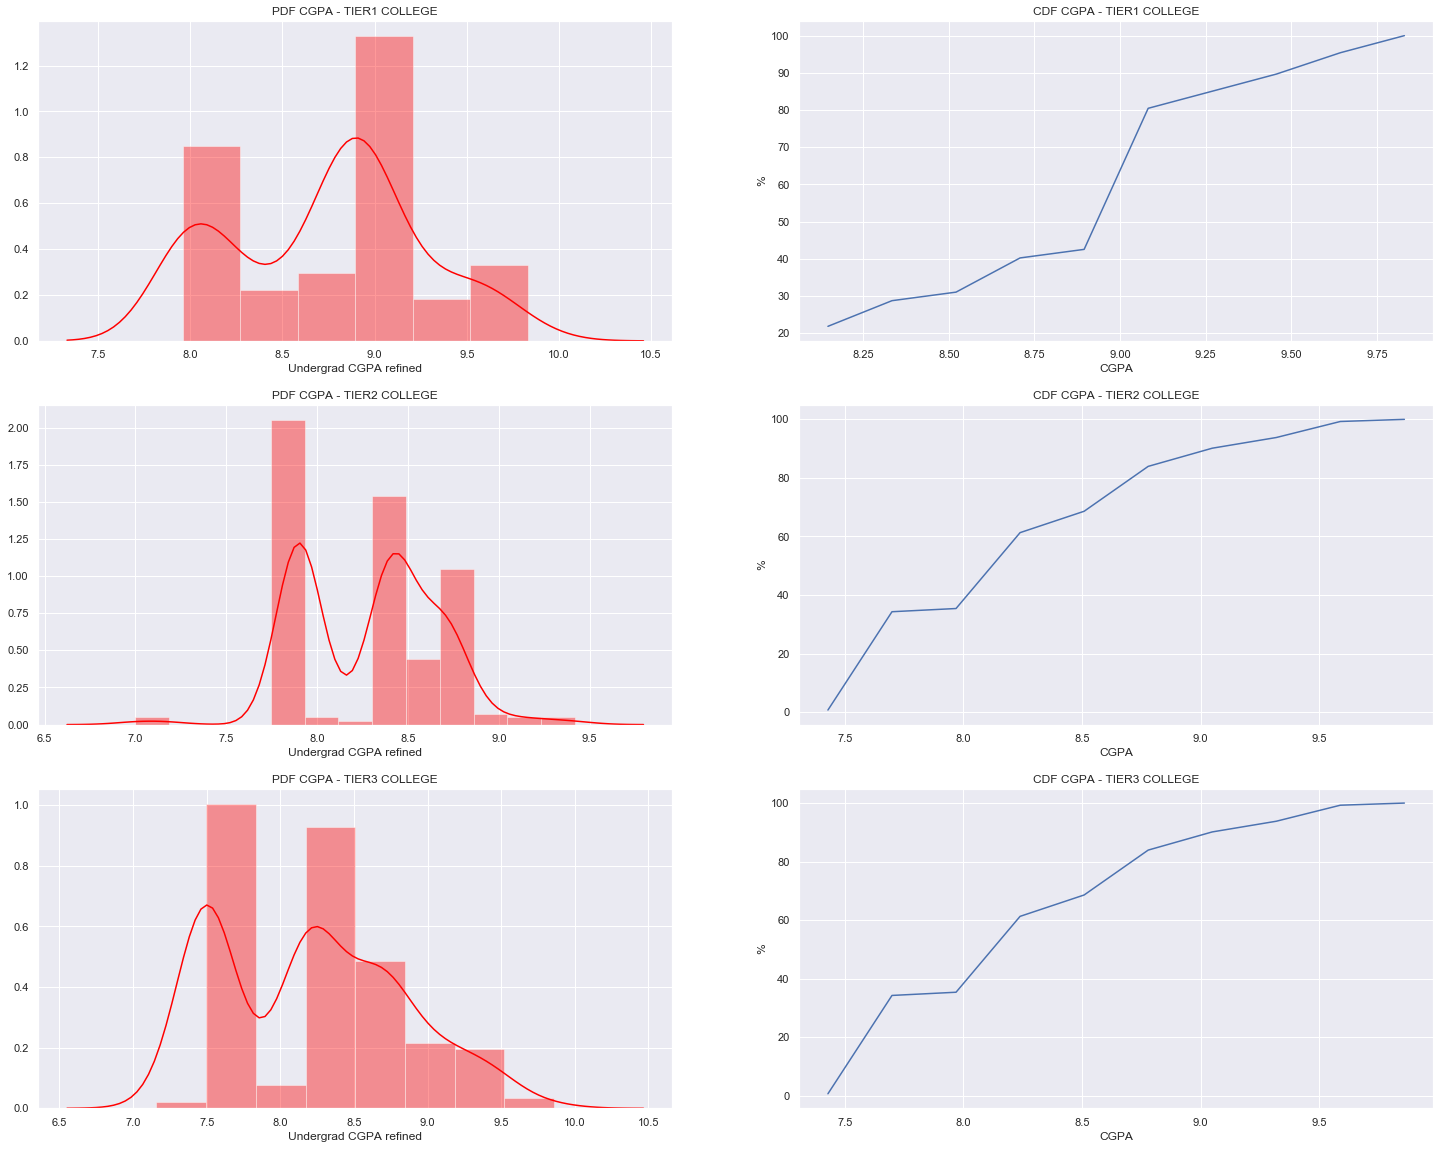

In [6]:
fig = plt.figure(figsize=(25, 20))
sns.set(style="darkgrid", palette="deep")

plt.subplot(3, 2, 1)
sns.distplot(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==1]['Undergrad CGPA refined'], color='red')
plt.title('PDF CGPA - TIER1 COLLEGE')

plt.subplot(3, 2, 2)
frequency_count, bin_edges = np.histogram(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==1]['Undergrad CGPA refined'])
cdf = np.cumsum(frequency_count)/sum(frequency_count)
plt.plot(bin_edges[1:], cdf*100)
plt.xlabel('CGPA')
plt.ylabel('%')
plt.title('CDF CGPA - TIER1 COLLEGE')

plt.subplot(3, 2, 3)
sns.distplot(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==2]['Undergrad CGPA refined'], color='red')
plt.title('PDF CGPA - TIER2 COLLEGE')

plt.subplot(3, 2, 4)
frequency_count, bin_edges = np.histogram(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==3]['Undergrad CGPA refined'])
cdf = np.cumsum(frequency_count)/sum(frequency_count)
plt.plot(bin_edges[1:], cdf*100)
plt.xlabel('CGPA')
plt.ylabel('%')
plt.title('CDF CGPA - TIER2 COLLEGE')

plt.subplot(3, 2, 5)
sns.distplot(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==3]['Undergrad CGPA refined'], color='red')
plt.title('PDF CGPA - TIER3 COLLEGE')

plt.subplot(3, 2, 6)
frequency_count, bin_edges = np.histogram(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==3]['Undergrad CGPA refined'])
cdf = np.cumsum(frequency_count)/sum(frequency_count)
plt.plot(bin_edges[1:], cdf*100)
plt.xlabel('CGPA')
plt.ylabel('%')
plt.title('CDF CGPA - TIER3 COLLEGE')


plt.tight_layout(w_pad=5, rect=[1, 1, 1, 1])
plt.show()

###  Distribution of Job Experience in years after Undergrad of targets  BACHELOR COLLEGES (TIER WISE) :

c:\users\shubhendra\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



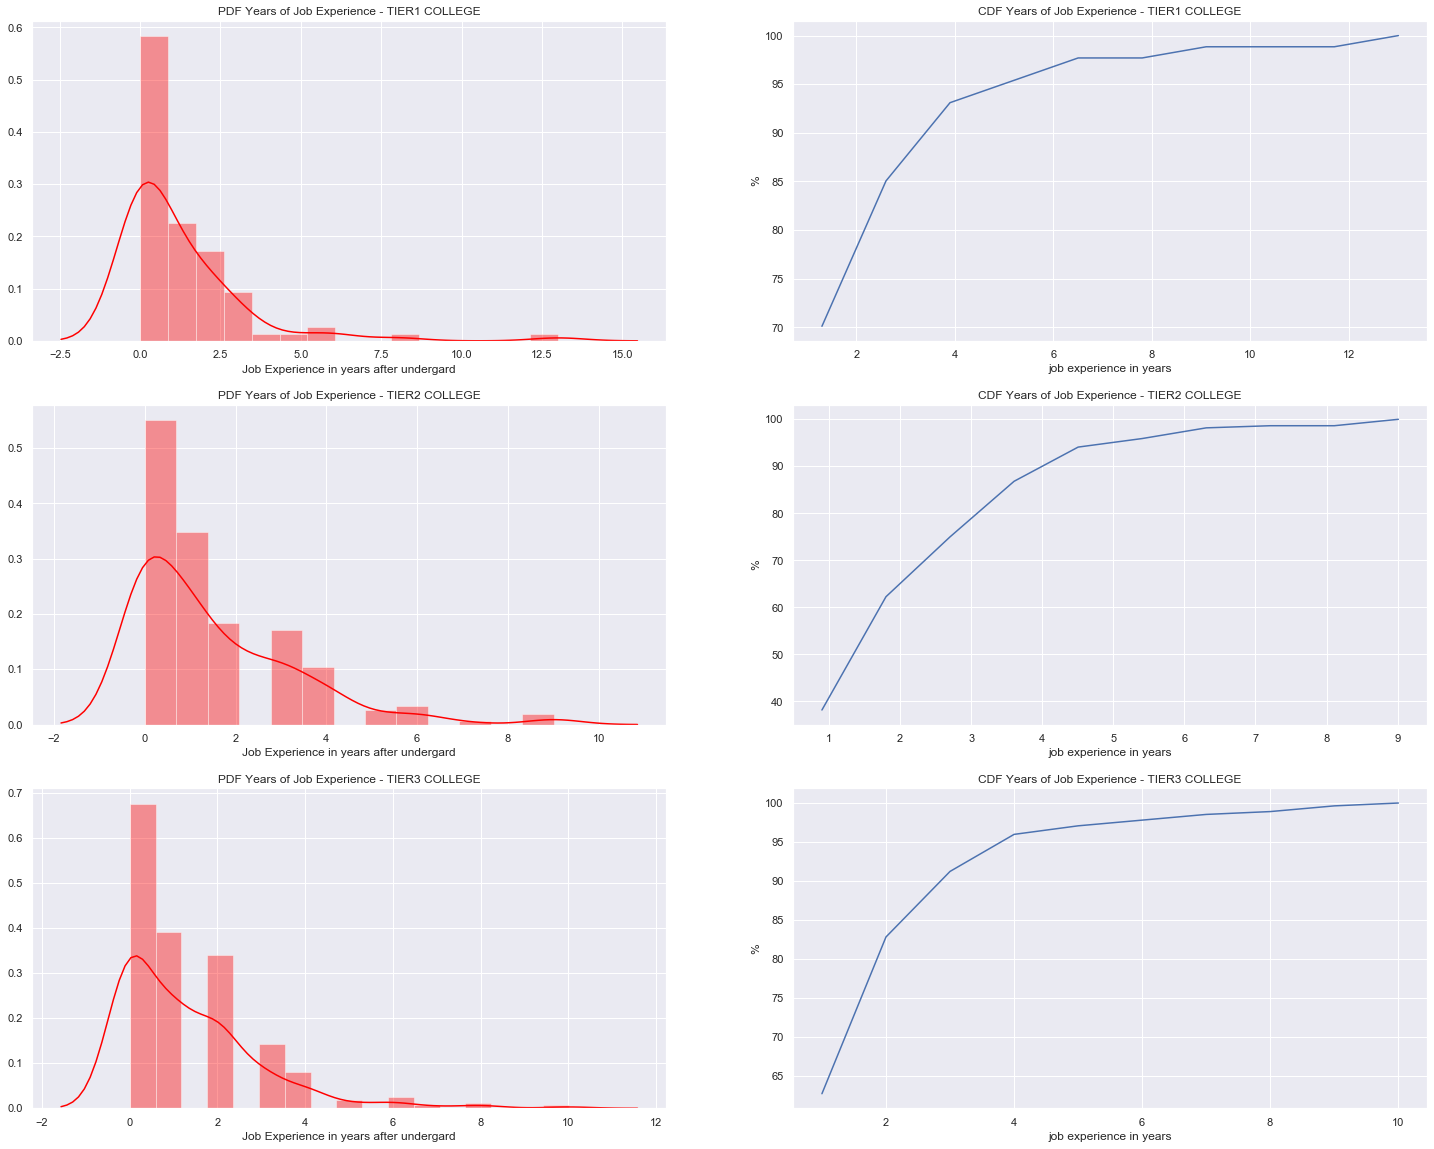

In [7]:
fig = plt.figure(figsize=(25, 20))
sns.set(style="darkgrid", palette="deep")

plt.subplot(3, 2, 1)
sns.distplot(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==1]['Job Experience in years after undergard'], color='red')
plt.title('PDF Years of Job Experience - TIER1 COLLEGE')

plt.subplot(3, 2, 2)
frequency_count, bin_edges = np.histogram(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==1]['Job Experience in years after undergard'])
cdf = np.cumsum(frequency_count)/sum(frequency_count)
plt.plot(bin_edges[1:], cdf*100)
plt.xlabel('job experience in years')
plt.ylabel('%')
plt.title('CDF Years of Job Experience - TIER1 COLLEGE')

plt.subplot(3, 2, 3)
sns.distplot(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==2]['Job Experience in years after undergard'], color='red')
plt.title('PDF Years of Job Experience - TIER2 COLLEGE')

plt.subplot(3, 2, 4)
frequency_count, bin_edges = np.histogram(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==2]['Job Experience in years after undergard'])
cdf = np.cumsum(frequency_count)/sum(frequency_count)
plt.plot(bin_edges[1:], cdf*100)
plt.xlabel('job experience in years')
plt.ylabel('%')
plt.title('CDF Years of Job Experience - TIER2 COLLEGE')

plt.subplot(3, 2, 5)
sns.distplot(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==3]['Job Experience in years after undergard'], color='red')
plt.title('PDF Years of Job Experience - TIER3 COLLEGE')

plt.subplot(3, 2, 6)
frequency_count, bin_edges = np.histogram(cleanedComputedData.loc[cleanedComputedData['Undergrad college Tier']==3]['Job Experience in years after undergard'])
cdf = np.cumsum(frequency_count)/sum(frequency_count)
plt.plot(bin_edges[1:], cdf*100)
plt.xlabel('job experience in years')
plt.ylabel('%')
plt.title('CDF Years of Job Experience - TIER3 COLLEGE')


plt.tight_layout(w_pad=5, rect=[1, 1, 1, 1])
plt.show()

###  No of Research publications - BACHELOR COLLEGES (TIER WISE) :

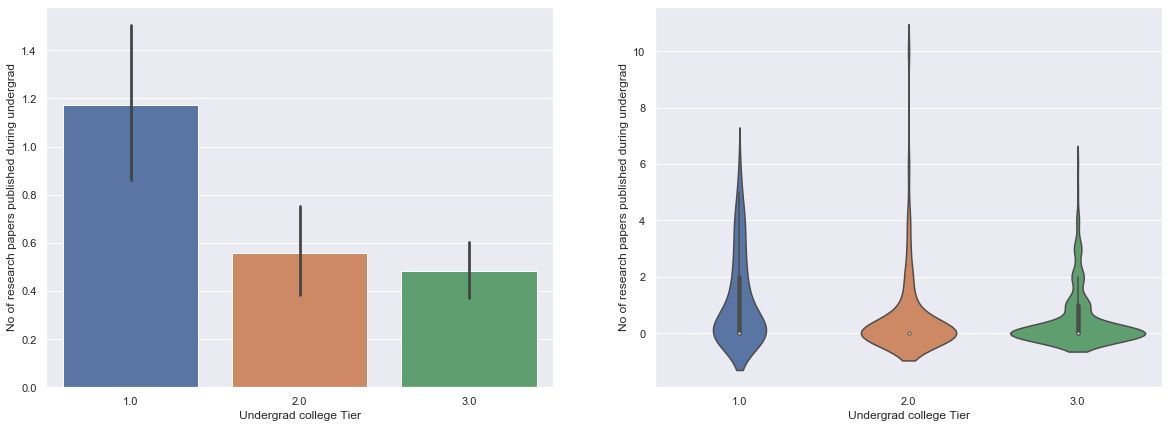

In [8]:
fig = plt.figure(figsize=(20, 7))
sns.set(style="darkgrid", palette="deep")

plt.subplot(1, 2, 1)
sns.barplot(data=cleanedComputedData,
            x = 'Undergrad college Tier',
            y = 'No of research papers published during undergrad')

plt.subplot(1, 2, 2)
sns.violinplot(data=cleanedComputedData,
            x = 'Undergrad college Tier',
            y = 'No of research papers published during undergrad')

###  No of Internships undergrad - BACHELOR COLLEGES (TIER WISE) :

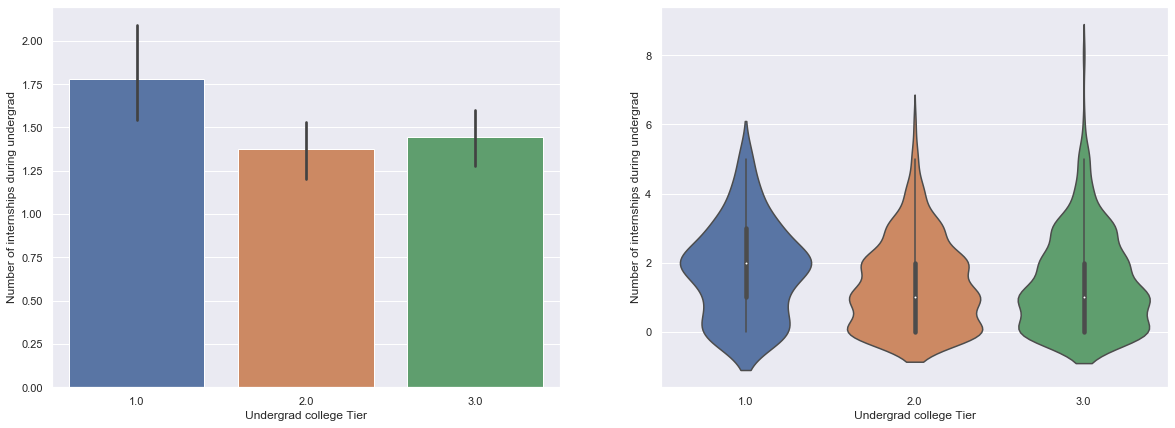

In [9]:
fig = plt.figure(figsize=(20, 7))
sns.set(style="darkgrid", palette="deep")

plt.subplot(1, 2, 1)
sns.barplot(data=cleanedComputedData,
            x = 'Undergrad college Tier',
            y = 'Number of internships during undergrad')

plt.subplot(1, 2, 2)
sns.violinplot(data=cleanedComputedData,
            x = 'Undergrad college Tier',
            y = 'Number of internships during undergrad')

###  Job Exp in years after undergrad - BACHELOR COLLEGES (TIER WISE) :

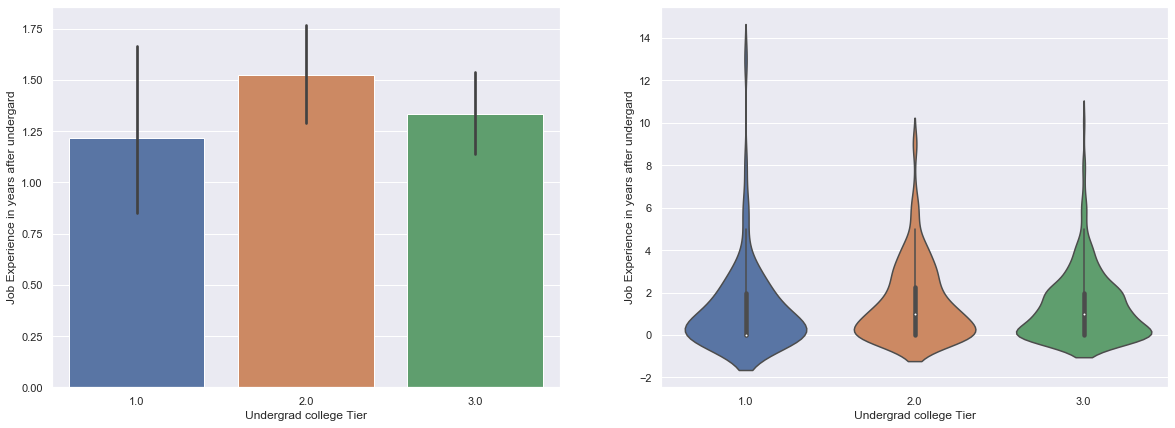

In [10]:
fig = plt.figure(figsize=(20, 7))
sns.set(style="darkgrid", palette="deep")

plt.subplot(1, 2, 1)
sns.barplot(data=cleanedComputedData,
            x = 'Undergrad college Tier',
            y = 'Job Experience in years after undergard')

plt.subplot(1, 2, 2)
sns.violinplot(data=cleanedComputedData,
            x = 'Undergrad college Tier',
            y = 'Job Experience in years after undergard')

# Employability Predictor :

### + CLASS DISTRIBUTION :

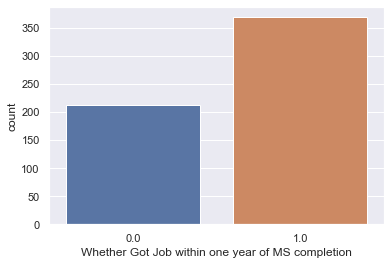

In [11]:
# count plot of the entire dataset :

sns.countplot(data=cleanedComputedData, x='Whether Got Job within one year of MS completion')

In [12]:
# DATA POINTS OF EACH CLASS :

print("ORIGINALLY CLASS 1 :", len(cleanedComputedData[cleanedComputedData['Whether Got Job within one year of MS completion']==1]))
print("ORIGINALLY CLASS 0 :", len(cleanedComputedData[cleanedComputedData['Whether Got Job within one year of MS completion']==0]))

ORIGINALLY CLASS 1 : 369
ORIGINALLY CLASS 0 : 212


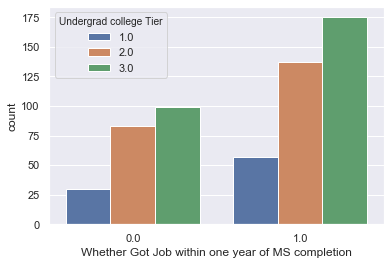

In [13]:
# FROM DOMAIN KNOWLEDGE REGARDING COLLEGER TIER IN ADMISSIONS FOR MASTERS  :

sns.countplot(data=cleanedComputedData, x='Whether Got Job within one year of MS completion', hue='Undergrad college Tier')

> <h3>PERFORMING SAMPLING ON INDIVIDUAL TIER WISE COLLEGE FOR CLASS LABEL '0' :</h3>

In [14]:
# # Ready dataset after upsampling :

# fig = plt.figure(figsize=(20, 7))
# sns.set(style="darkgrid", palette="deep")

# plt.subplot(1,2,1)
# plt.title('ORIGINAL CLASS DISTRIBUTION')
# sns.countplot(data=cleanedComputedData, x='Whether Got Job within one year of MS completion')

# plt.subplot(1,2,2)
# plt.title('SAMPLED DISTRIBUTION ')
# sns.countplot(data=cleanedComputedSampledData, x='Whether Got Job within one year of MS completion')

# plt.tight_layout(w_pad=5, rect=[1, 1, 1, 1])
# plt.show()

In [15]:
cleanedComputedData.head()

,Job Experience in years after undergard,MS university name,No of research papers published during undergrad,Number of internships during undergrad,Undergrad college Tier,Whether Got Job within one year of MS completion,Whether Job after Undergrad 1/0,World ranking of university MS,entire education detail,entire experience detail,linkedin url,student name,student summary,undergrad college name,Undergrad CGPA refined
0,0.0,Georgia Institute of Technology,0,0,2.0,1.0,0.0,34.0,"{ ""education_1"" : { ""InstituteName"" : ""Georgia...","{ ""experience_1"" : ""Company Name Amazon Total ...",https://www.linkedin.com/in/saurabh-shah-22b0b...,Saurabh Shah,Software Development Manager at Amazon,University of Mumbai,8.4
1,0.0,University of Wisconsin-Madison,0,2,1.0,1.0,0.0,44.0,"{ ""education_1"" : { ""InstituteName"" : ""Univers...","{ ""experience_1"" : ""Research Assistant Company...",https://www.linkedin.com/in/somyarora/,NaN,NaN,"Indian Institute of Technology, Delhi",9.1
2,0.0,"University of California, Santa Barbara",1,0,1.0,1.0,0.0,37.0,"{ ""education_1"" : { ""InstituteName"" : ""Univers...","{ ""experience_1"" : ""Engineering Manager Compan...",https://www.linkedin.com/in/rajesh-kumar-ucsb/,Rajesh Kumar,Engineering Manager at Google,Indian Institute of Technology (Banaras Hindu ...,8.9
3,1.0,Carnegie Mellon University,0,3,3.0,1.0,1.0,24.0,"{ ""education_1"" : { ""InstituteName"" : ""Carnegi...","{ ""experience_1"" : ""Company Name Oracle Total ...",https://www.linkedin.com/in/anishacherodian/,Anisha Cherodian,Member Of Technical Staff at Oracle,KJ Somaiya College of Engineering,8.2
4,0.0,Carnegie Mellon University,5,4,1.0,1.0,0.0,24.0,"{ ""education_1"" : { ""InstituteName"" : ""Carnegi...","{ ""experience_1"" : ""Software Engineer - ML/AI ...",https://www.linkedin.com/in/shivani-poddar/,Shivani Poddar,Software Engineer - ML/AI at Facebook,International Institute of Information Technology,8.9


In [16]:
# columns of dataset :
cleanedComputedData.columns

Index(['Job Experience in years after undergard', 'MS university name',
       'No of research papers published during undergrad',
       'Number of internships during undergrad', 'Undergrad college Tier',
       'Whether Got Job within one year of MS completion',
       'Whether Job after Undergrad 1/0', 'World ranking of university MS',
       'entire education detail', 'entire experience detail', 'linkedin url',
       'student name', 'student summary', 'undergrad college name',
       'Undergrad CGPA refined'],
      dtype='object')

In [17]:
# Considering only the relevant parametes :

cleanedComputedData = cleanedComputedData[['Job Experience in years after undergard',
       'No of research papers published during undergrad',
       'Number of internships during undergrad', 'Undergrad college Tier',
       'Whether Got Job within one year of MS completion',
       'Whether Job after Undergrad 1/0', 'World ranking of university MS','Undergrad CGPA refined']]


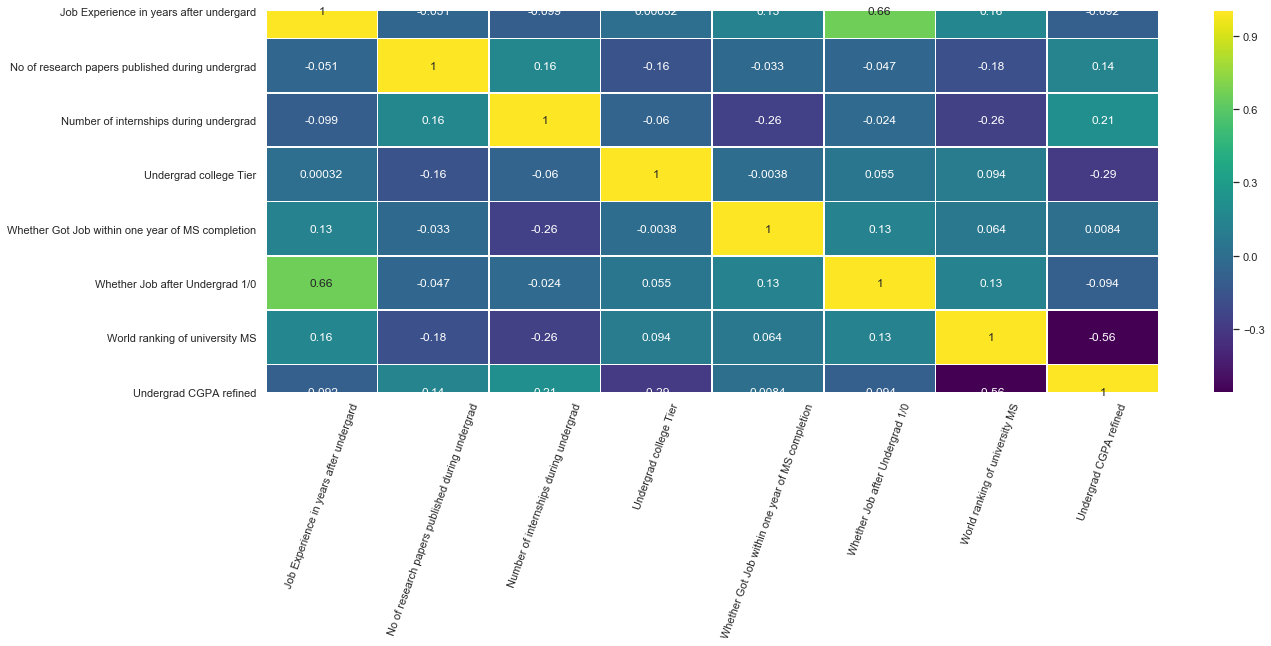

In [18]:
# PEARSON CORRELATION AMONG QUANTITATIVE FACTORS :

plt.figure(figsize=(20, 7))
plt.xticks(rotation=70)
sns.heatmap(cleanedComputedData.corr(), cmap='viridis', annot=True, linewidths=0.5)

><h1>Normality Testing :</h1>

>> <h2>QUANTILE-QUANTILE TESTING FOR NORMALITY VARIATION :</h2>

c:\users\shubhendra\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



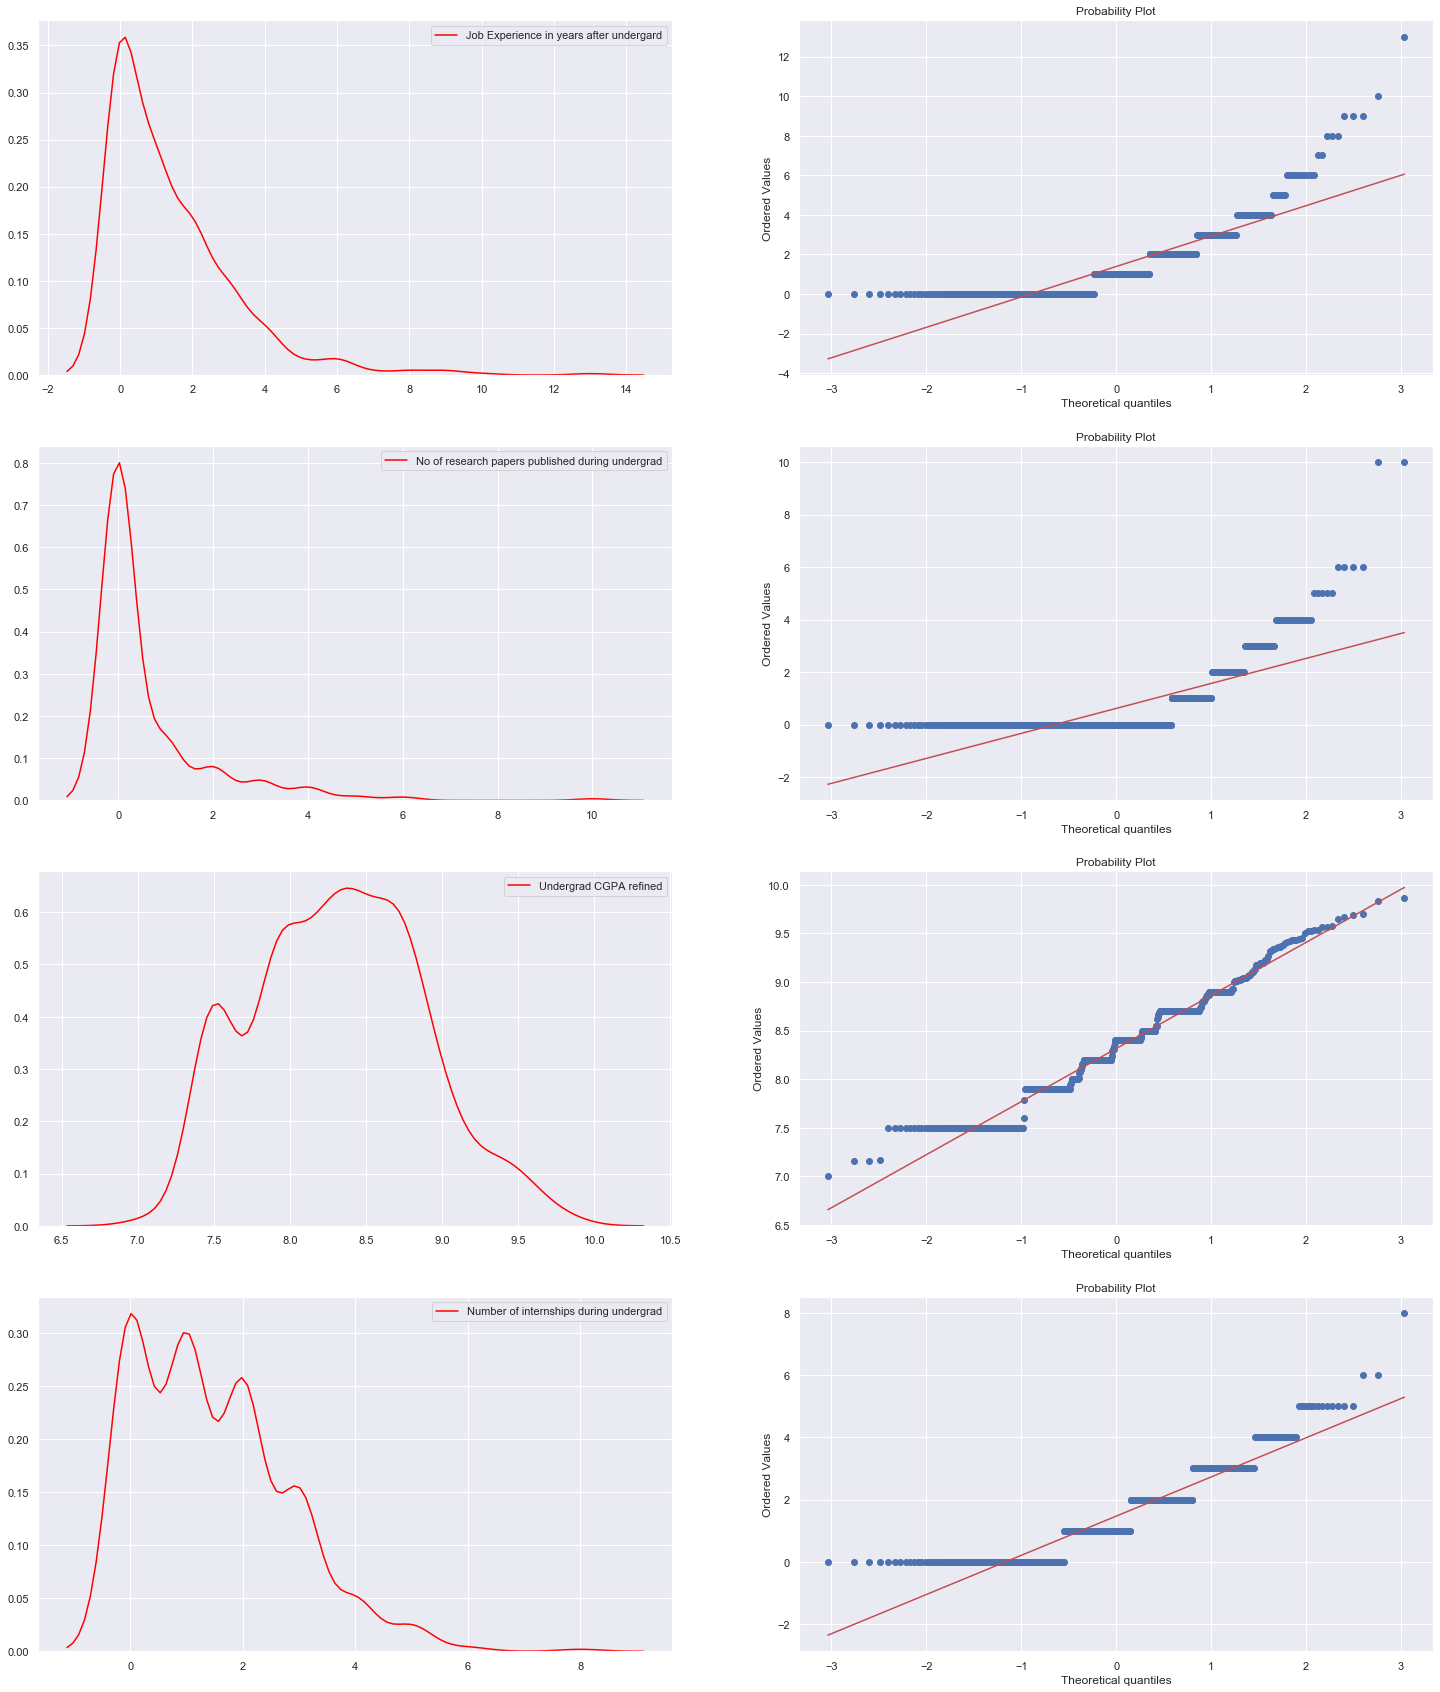

In [19]:
plt.figure(figsize=(25, 30))

plt.subplot(4,2,1)
sns.kdeplot(cleanedComputedData['Job Experience in years after undergard'], color='red')

plt.subplot(4,2,2)
stats.probplot(cleanedComputedData['Job Experience in years after undergard'], dist='norm', plot=pylab)

plt.subplot(4,2,3)
sns.kdeplot(cleanedComputedData['No of research papers published during undergrad'], color='red')

plt.subplot(4,2,4)
stats.probplot(cleanedComputedData['No of research papers published during undergrad'], dist='norm', plot=pylab)

plt.subplot(4,2,5)
sns.kdeplot(cleanedComputedData['Undergrad CGPA refined'], color='red')

plt.subplot(4,2,6)
stats.probplot(cleanedComputedData['Undergrad CGPA refined'], dist='norm', plot=pylab)

plt.subplot(4,2,7)
sns.kdeplot(cleanedComputedData['Number of internships during undergrad'], color='red')

plt.subplot(4,2,8)
stats.probplot(cleanedComputedData['Number of internships during undergrad'], dist='norm', plot=pylab)

plt.tight_layout(w_pad=5, rect=[1,1,1,1])
plt.show()

> <h2>Data PreProcessing :</h2>

In [20]:
cleanedComputedData.columns

Index(['Job Experience in years after undergard',
       'No of research papers published during undergrad',
       'Number of internships during undergrad', 'Undergrad college Tier',
       'Whether Got Job within one year of MS completion',
       'Whether Job after Undergrad 1/0', 'World ranking of university MS',
       'Undergrad CGPA refined'],
      dtype='object')

In [21]:
cleanedComputedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 8 columns):
Job Experience in years after undergard             581 non-null float64
No of research papers published during undergrad    581 non-null int64
Number of internships during undergrad              581 non-null int64
Undergrad college Tier                              581 non-null float64
Whether Got Job within one year of MS completion    581 non-null float64
Whether Job after Undergrad 1/0                     581 non-null float64
World ranking of university MS                      581 non-null float64
Undergrad CGPA refined                              581 non-null float64
dtypes: float64(6), int64(2)
memory usage: 36.4 KB


In [22]:
cleanedComputedData.shape

(581, 8)

### Data Preprocessing :

In [23]:
# DATA :

y = cleanedComputedData['Whether Got Job within one year of MS completion']  # 'y' variable
del cleanedComputedData['Whether Got Job within one year of MS completion']
X = cleanedComputedData.iloc[:, :]  # all datapoints except 'y' variable



# TRAIN TEST SPLIT :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
# no of datapoints in train set :

X_train.shape

(464, 7)

In [25]:
# no of datapoints in test set :

X_test.shape

(117, 7)

### Upsampling the train set for class '0' : 

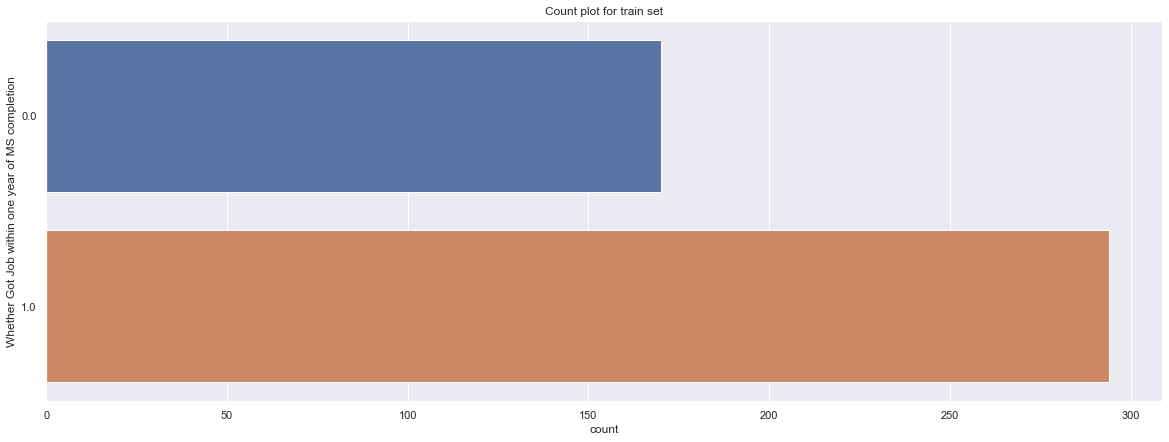

In [26]:
plt.figure(figsize=(20, 7))
plt.title('Count plot for train set')
sns.countplot(y=y_train)

# NEED TO PERFORM SAMPLING ON CLASS LABEL '0'

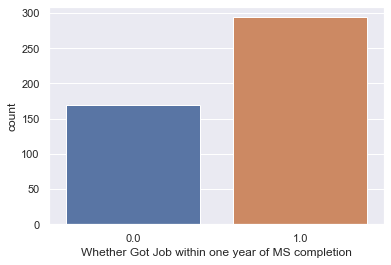

In [27]:
train_df = pd.concat([X_train, y_train], axis='columns')  # combining the 'X_train + y_train'
sns.countplot(x=train_df['Whether Got Job within one year of MS completion'])  # train set variable - 'y'

In [28]:
train_df.head()

,Job Experience in years after undergard,No of research papers published during undergrad,Number of internships during undergrad,Undergrad college Tier,Whether Job after Undergrad 1/0,World ranking of university MS,Undergrad CGPA refined,Whether Got Job within one year of MS completion
431,1.0,1,0,3.0,1.0,160.0,7.50,0.0
208,2.0,0,2,3.0,1.0,24.0,8.20,1.0
184,2.0,0,2,3.0,1.0,34.0,9.04,0.0
177,0.0,0,1,2.0,0.0,56.0,8.40,0.0
192,0.0,0,1,2.0,0.0,147.0,7.90,0.0


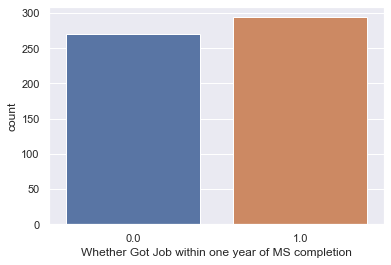

In [29]:
# UPSAMPLING :

minority_class_0 = train_df.ix[train_df['Whether Got Job within one year of MS completion']==0].sample(100) # randomly selecting 80 points of class_0
train_df = train_df.append(minority_class_0)

sns.countplot(x=train_df['Whether Got Job within one year of MS completion'])  # train set variable - 'y'

In [30]:
# After upsampling on train sets :

train_df['Whether Got Job within one year of MS completion'].value_counts()

1.0    294
0.0    270
Name: Whether Got Job within one year of MS completion, dtype: int64

## <font color='Red'>Deciding a simple Model :<font>

<h6> Problem statement : </h6>
<p> Classify the given student on the basis of his/her credentials whether he/she will obtain a job after Masters from abroad within a time duration of one year . </p>

<h6>1.3. Real-world/Business objectives and constraints </h6>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly as the loan is to be financed by the bank
* Probability of a data-point belonging to each class is needed.

In [31]:
print('Dimensions :', train_df.shape[1])
print('No of data points:', train_df.shape[0])

Dimensions : 8
No of data points: 564


Data Facts & Details :

>+ The dimensionlaity of the datset is small.
>+ No of datapoints is not very high.
>+ Use of ensemble model is not encouraged due to lack of more datapoints.

<h6> Best Candidate Models :</h6>

><h6>Logistic Regression, Decision Trees & KNN:</h6> 

>+ Highly interpretable & Simple.
>+ Less training and Test time complexity.
>+ Justifies low latencey usage. 
>+ Not considering <b>*Naive Bayes*</b> due to lack of datapoints in computing conditional probability considering numerical features. 

<h3><font color='blue'> <i>Logistic Regression</b> Model: </i><font></h3>

In [32]:
# Bringing back the 'X_train' and 'y_train' from train_df :

X_train = train_df.ix[:, :-1] # X_train
y_train = train_df.ix[:, -1]  # y_train

In [33]:
# DATA STANDARDIZATION :

scaler_x = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [34]:
y_train.value_counts()

1.0    294
0.0    270
Name: Whether Got Job within one year of MS completion, dtype: int64

#### *First Cut model in LR:*

In [35]:
# Minimizing the log loss -> optimizing to obtain logistic Regression :

logistic = SGDClassifier(loss='log')
logistic.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
# Calibrated classifiers on test dataset  :

sig_clf_lr = CalibratedClassifierCV(logistic, method="sigmoid")
sig_clf_lr.fit(X_train_scaled, y_train)
sig_clf_logistic_probs_test = sig_clf_lr.predict_proba(X_test_scaled)

print('Test Data Log loss first cut model :', log_loss(y_test, sig_clf_logistic_probs_test))

Test Data Log loss first cut model : 0.6573290656137258


In [38]:
# calibrated probabilities on the train set :

sig_clf_logistic_probs_train = sig_clf_lr.predict_proba(X_train_scaled)

print('Train Data Log loss first cut model :', log_loss(y_train, sig_clf_logistic_probs_train))

Train Data Log loss first cut model : 0.6707502850963903


In [39]:
print('LR Train log loss first cut model :', 0.6573290656137258)
print('LR Test log loss first cut model :', 0.6707502850963903)  # difference of mere 0.06 units of log loss

LR Train log loss first cut model : 0.6573290656137258
LR Test log loss first cut model : 0.6707502850963903


In [40]:
# CROSS vALIDATING the first cut model in LR :

cross_val = cross_val_score(estimator=logistic, X=X_train_scaled, y=y_train, scoring='neg_log_loss', cv=5, n_jobs=-1)
print('Cross validation score for first cut model : ', cross_val.mean()*-1)

Cross validation score for first cut model :  1.1243160268310106


In [41]:
# cross validation results :

cross_val*-1 

array([1.43506714, 1.06475066, 0.85999111, 0.92315912, 1.3386121 ])

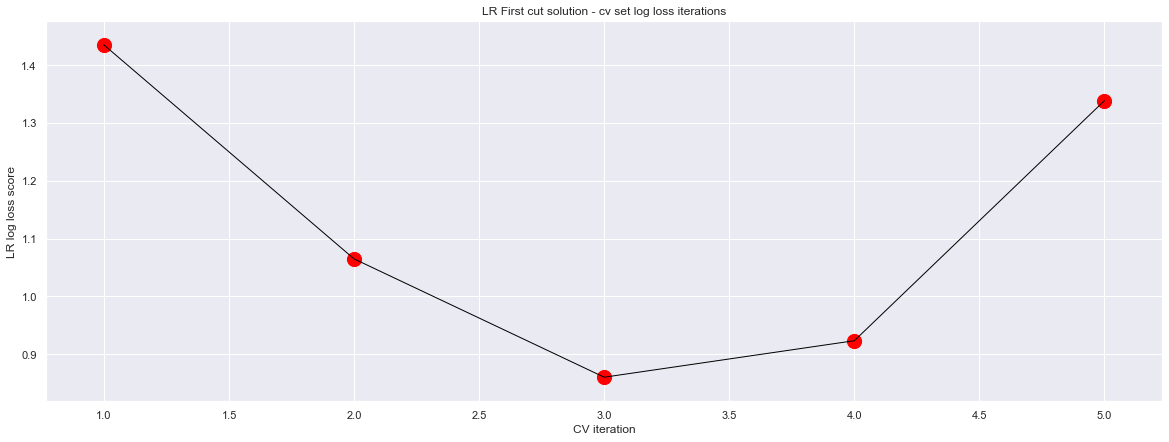

In [49]:
# Debugging the CV set iterations :

plt.figure(figsize=(20, 7))
plt.title('LR First cut solution - cv set log loss iterations')
plt.ylabel('LR log loss score')
plt.xlabel('CV iteration')

plt.plot(np.arange(1,6), 
         cross_val*-1, 
         linewidth=1, color='black')

plt.scatter(np.arange(1,6), 
         cross_val*-1, 
         linewidth=1, color='red', marker='o', s=200)

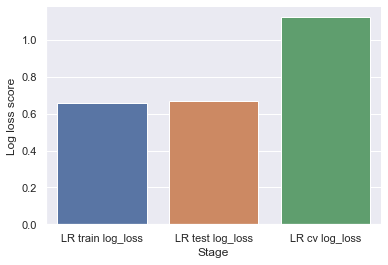

In [45]:
dict_first_cut_model = {}

dict_first_cut_model['LR train log_loss'] = [0.6573290656137258]  # train loss
dict_first_cut_model['LR test log_loss'] = [0.6707502850963903]  # test loss

dict_first_cut_model['LR cv log_loss'] = [cross_val.mean()*-1]  # cv set log loss


first_cut_LR = pd.DataFrame(dict_first_cut_model).transpose()
first_cut_LR.reset_index(inplace=True)
first_cut_LR.columns = ['Stage', 'Log loss score']

# sns.set('whitegrid', context='notebook')
sns.barplot(data=first_cut_LR, x='Stage', y='Log loss score')
sns.despine(top=True)

<b>*Inference :*</b>

+ Since the first cut LR model(@ alpha=0.0001), displayed log loss score least on train set but very high on cross validation set, hence its safe to conclude that the model is overfitting a lot.

### Secondary evaluation metrics (not our *priority*) :

In [85]:
# ax = sns.heatmap(confusion_matrix(y_test, logistic.predict(X_test_scaled)), 
#                      cmap='viridis', 
#                      annot=True, 
#                      fmt='g',
#                      annot_kws={"size": 16}, 
#                      linewidths=0.5,
#                      xticklabels=['0 - predicted','1 - predicted'],
#                      yticklabels=['0 - actual','1 - actual'])
# ax.set_ylim(2.0, 0)

### Do We need to care about accuracy/precision/recall scores ?

+ Our prime objective was to get actual predicted probability scores for datapoints
+ Log Loss is our prime evaluation metric here

> Already obtained true probabilities using calibrated classifiers : 

In [51]:
# # Calibrated classifiers :

# sig_clf = CalibratedClassifierCV(logistic, method="sigmoid")
# sig_clf.fit(X_train_scaled, y_train)
# sig_clf_logistic_probs = sig_clf.predict_proba(X_test_scaled)
# print('Log Loss Score - Logistic Regression :', log_loss(y_test, sig_clf_logistic_probs))

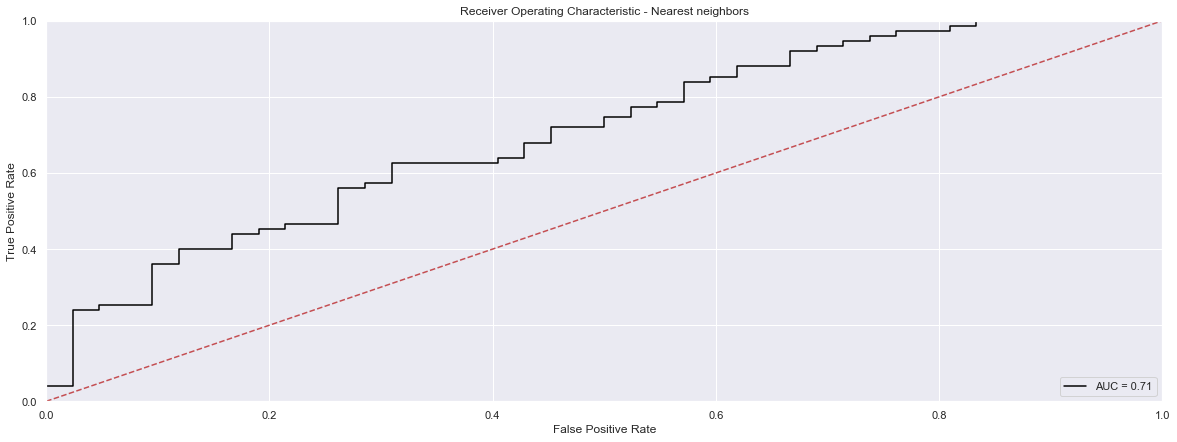

In [54]:
from sklearn.metrics import roc_curve, auc
probs = sig_clf_logistic_probs_test  # predicted probabilities by the calibrated model on the test set 
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.title('Receiver Operating Characteristic - Nearest neighbors')
plt.plot(fpr, tpr, 'black', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
# SOLVING THE HIGH VARIANCE ISSUE :

from sklearn.model_selection import RandomizedSearchCV

params = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}

randomizedSearch_lr = RandomizedSearchCV(estimator=logistic, 
                                param_distributions=params, 
                                scoring='neg_log_loss',
                                n_jobs=-1, 
                                cv=5)

randomizedSearch_lr.fit(X_train_scaled, y_train)

c:\users\shubhendra\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning:

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.

c:\users\shubhendra\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=None, penalty='l2',
                                           power_t=0.5, random_state=None,
                                           shuffle=True, tol=0.001,
                                           validation_fraction=0.1, verbose=0,
                                           warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distribut

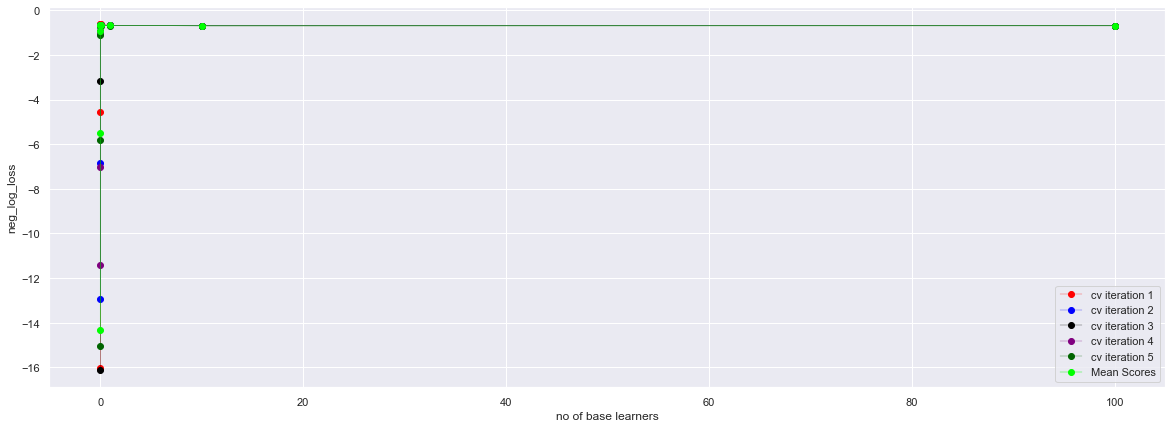

In [74]:
plt.figure(figsize=(20, 7))
# plt.set_xlim([0.9,1.])
plt.plot(params['alpha'], tuned_report['split0_test_score'], marker='o',c='red',linewidth=0.3 ,label='cv iteration 1')
plt.plot(params['alpha'], tuned_report['split1_test_score'], marker='o',c='blue',linewidth=0.3 ,label='cv iteration 2')
plt.plot(params['alpha'], tuned_report['split2_test_score'], marker='o',c='black',linewidth=0.3,label='cv iteration 3')
plt.plot(params['alpha'], tuned_report['split3_test_score'], marker='o',c='purple',linewidth=0.3,label='cv iteration 4')
plt.plot(params['alpha'], tuned_report['split4_test_score'], marker='o',c='darkgreen',linewidth=0.3, label='cv iteration 5')
plt.plot(params['alpha'], tuned_report['mean_test_score'], marker='o', c='lime', linewidth=0.4,  label='Mean Scores')

plt.xlabel('no of base learners')
plt.ylabel('neg_log_loss')

plt.legend()

In [77]:
# Objective is to note the roc_auc scores at different values of hyperparameter(no of base learners) for the train set
# roc_auc_scores on cv set has already been noted from the above exercise

from tqdm import tqdm
train_set_log_loss = []

for each in tqdm(params['alpha']):
    
    lr = SGDClassifier(alpha=each, loss='log')
    lr.fit(X_train_scaled, y_train)
    
    clf_isotonic = CalibratedClassifierCV(lr, cv=10, method='isotonic')
    clf_isotonic.fit(X_train_scaled, y_train)
    predicted_probabilites_per_class = clf_isotonic.predict_proba(X_train_scaled)
    
    train_set_log_loss.append(log_loss(y_train, predicted_probabilites_per_class))

100%|███████████████████████████████████████████| 9/9 [00:00<00:00, 17.07it/s]


In [80]:
tuned_report_log_loss = pd.DataFrame(randomizedSearch_lr.cv_results_)
tuned_report_log_loss

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003803,7.487745e-04,0.003803,1.166564e-03,1e-06,{'alpha': 1e-06},-16.047259,-12.922597,-16.124033,-11.402844,-15.060694,-14.310157,1.858728,9
1,0.008606,2.802270e-03,0.009607,1.371475e-02,1e-05,{'alpha': 1e-05},-4.574019,-6.860135,-3.153045,-7.017737,-5.801745,-5.480768,1.457830,8
2,0.010407,4.366412e-03,0.003402,4.901740e-04,0.0001,{'alpha': 0.0001},-0.665792,-1.010491,-0.922532,-1.009399,-1.129452,-0.947210,0.155441,7
3,0.005003,6.328622e-04,0.002802,4.002573e-04,0.001,{'alpha': 0.001},-0.618724,-0.709409,-0.651532,-0.658120,-0.719745,-0.671421,0.037735,3
4,0.003402,8.004905e-04,0.002602,4.901939e-04,0.01,{'alpha': 0.01},-0.631866,-0.662594,-0.653601,-0.646555,-0.699890,-0.658829,0.022781,2
5,0.003002,5.761645e-07,0.003002,4.101908e-07,0.1,{'alpha': 0.1},-0.634399,-0.658630,-0.656200,-0.648587,-0.687235,-0.656956,0.017283,1
6,0.002602,4.898046e-04,0.002202,3.996383e-04,1,{'alpha': 1.0},-0.672100,-0.676379,-0.680994,-0.673821,-0.685466,-0.677738,0.004878,4
7,0.002601,4.904076e-04,0.003003,6.327114e-04,10,{'alpha': 10},-0.698896,-0.696969,-0.693606,-0.695465,-0.704144,-0.697805,0.003604,6
8,0.002602,4.900967e-04,0.002402,4.905643e-04,100,{'alpha': 100},-0.698661,-0.699033,-0.692581,-0.699598,-0.698558,-0.697685,0.002580,5


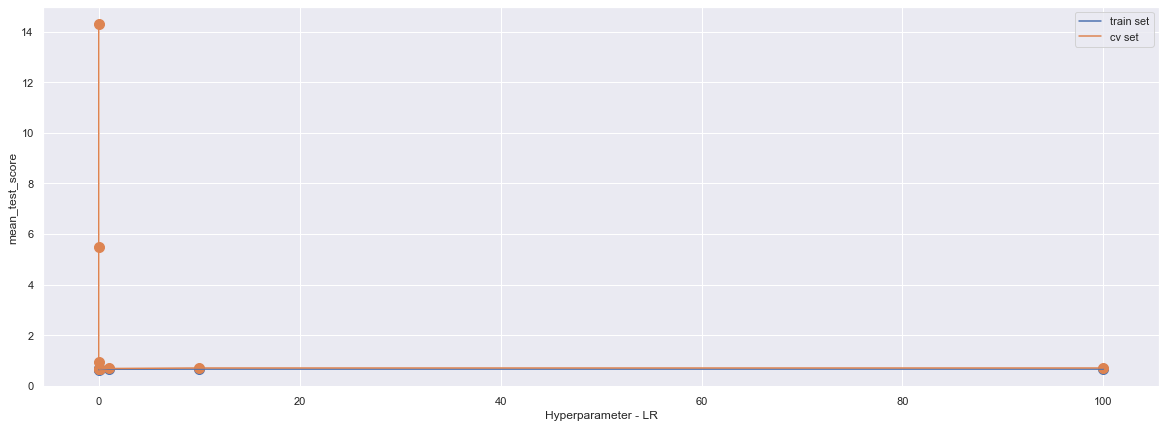

In [83]:
# PERFORMANCE AT SEVERAL VALUES OF HYPER PARAMETER ON TRAIN SET AND CV SET :
# PERFORMANCE METRIC IS ROC-AUC SCORE :

plt.figure(figsize=(20, 7))
# plt.annotate(params['alpha'], train_set_roc_auc)
plt.xlabel('Hyperparameter(alpha) - LR')
plt.scatter(params['alpha'], train_set_log_loss, marker='o', s=100)
plt.scatter(params['alpha'], np.abs(tuned_report_log_loss['mean_test_score']), marker='o', s=100)
sns.lineplot(params['alpha'], train_set_log_loss, label='train set')
sns.lineplot(params['alpha'], np.abs(tuned_report_log_loss['mean_test_score']), label='cv set')

In [87]:
# At alpha=0.01, we get the maximum negativeLogLoss i.e. least +log_loss on both the train & cross validation sets.

logistic_tuned = SGDClassifier(loss='log', alpha=0.1)
logistic_tuned.fit(X_train_scaled, y_train)

# Calibrated classifiers on test dataset  :

sig_clf_lr = CalibratedClassifierCV(logistic_tuned, method="sigmoid") # sigmoid for lesss amount of datapoints
sig_clf_lr.fit(X_train_scaled, y_train)
sig_clf_logistic_probs_test = sig_clf_lr.predict_proba(X_test_scaled)

print('Test Data Log loss tuned model :', log_loss(y_test, sig_clf_logistic_probs_test))

Test Data Log loss first cut model : 0.6336101966576653


In [89]:
print('Train Data Log loss tuned model :', log_loss(y_train, sig_clf_lr.predict_proba(X_train_scaled)))

Train Data Log loss tuned model : 0.6468627121482621


In [90]:
print('CV Data log loss tuned model :', 0.656956) # from the cv_results during random grid search

CV Data log loss tuned model : 0.656956


<b>*Inference :*</b>

+ Reduced the log loss error from 1.124 to 0.65 (CV sets respectively) AND reduced the final test log loss from 0.67 to 0.63

<h3><font color='blue'> <i>Decision Tree</b> Model: </i><font></h3>

#### *First Cut model in DTree:*

In [91]:
# Minimizing the log loss -> optimizing to obtain logistic Regression :

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
# Calibrated classifiers on test dataset  :

sig_clf_dtree = CalibratedClassifierCV(dtree, method="sigmoid")
sig_clf_dtree.fit(X_train, y_train)
sig_clf_dtree_probs_test = sig_clf_dtree.predict_proba(X_test)

print('Test Data Log loss first cut model in decision tree :', log_loss(y_test, sig_clf_dtree_probs_test))

Test Data Log loss first cut model in decision tree : 0.6627199719399999


In [93]:
# calibrated probabilities on the train set :

sig_clf_dtree_probs_train = sig_clf_dtree.predict_proba(X_train)

print('Train Data Log loss first cut model in DT model :', log_loss(y_train, sig_clf_dtree_probs_train))

Train Data Log loss first cut model in DT model : 0.360837623404204


In [94]:
print('LR Train log loss first cut model :', 0.6627199719399999)
print('LR Test log loss first cut model :', 0.360837623404204)  

LR Train log loss first cut model : 0.6627199719399999
LR Test log loss first cut model : 0.360837623404204


In [95]:
# CROSS vALIDATING the first cut model in LR :

cross_val = cross_val_score(estimator=dtree, X=X_train, y=y_train, scoring='neg_log_loss', cv=5, n_jobs=-1)
print('Cross validation score for first cut model in dtree : ', cross_val.mean()*-1)

Cross validation score for first cut model in dtree :  8.150450889333595


In [96]:
# cross validation results :

cross_val*-1 

array([9.48502546, 7.64140712, 9.19165481, 9.18548539, 5.24868166])

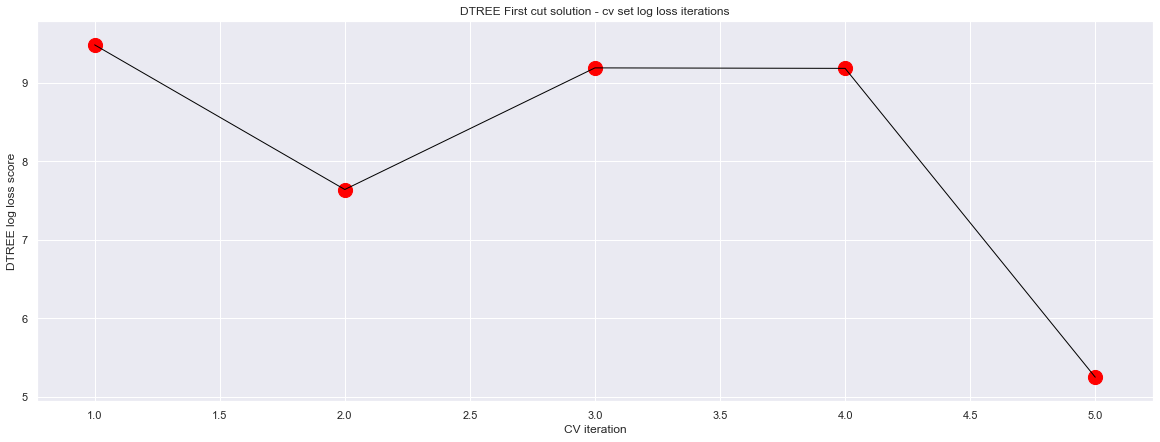

In [98]:
# Debugging the CV set iterations :

plt.figure(figsize=(20, 7))
plt.title('DTREE First cut solution - cv set log loss iterations')
plt.ylabel('DTREE log loss score')
plt.xlabel('CV iteration')

plt.plot(np.arange(1,6), 
         cross_val*-1, 
         linewidth=1, color='black')

plt.scatter(np.arange(1,6), 
         cross_val*-1, 
         linewidth=1, color='red', marker='o', s=200)

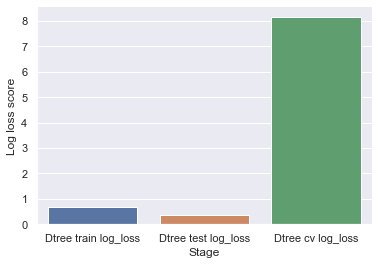

In [99]:
dict_first_cut_model = {}

dict_first_cut_model['Dtree train log_loss'] = [0.6627199719399999]  # train loss
dict_first_cut_model['Dtree test log_loss'] = [0.360837623404204]  # test loss

dict_first_cut_model['Dtree cv log_loss'] = [cross_val.mean()*-1]  # cv set log loss


first_cut_Dtree= pd.DataFrame(dict_first_cut_model).transpose()
first_cut_Dtree.reset_index(inplace=True)
first_cut_Dtree.columns = ['Stage', 'Log loss score']

# sns.set('whitegrid', context='notebook')
sns.barplot(data=first_cut_Dtree, x='Stage', y='Log loss score')
sns.despine(top=True)

<b>*Inference :*</b>

+ Since the first cut Dtree model, displayed log loss score least on train set but very high on cross validation set, hence its safe to conclude that the model is overfitting a lot.

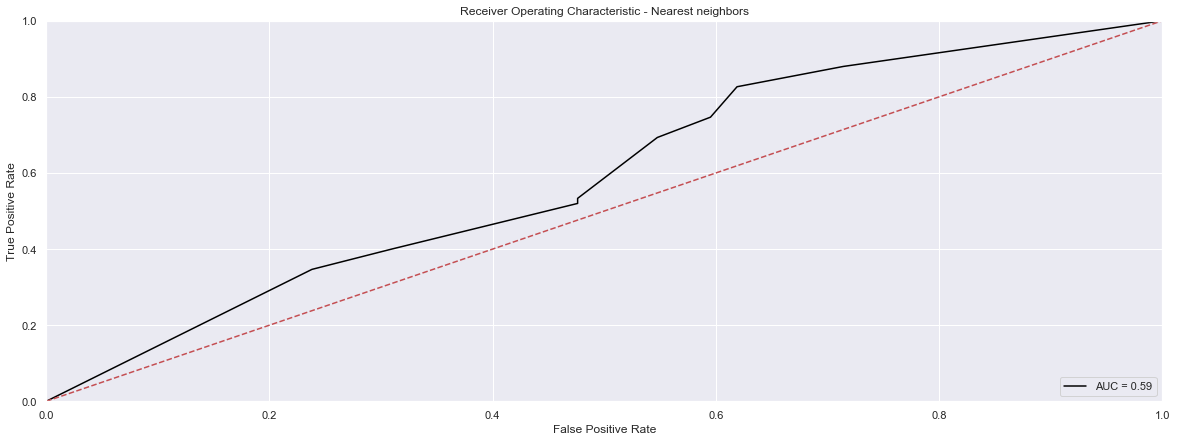

In [100]:
from sklearn.metrics import roc_curve, auc
probs = sig_clf_dtree_probs_test  # predicted probabilities by the calibrated model on the test set 
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.title('Receiver Operating Characteristic - Nearest neighbors')
plt.plot(fpr, tpr, 'black', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
# SOLVING THE HIGH VARIANCE ISSUE :

from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50]}

randomizedSearch_dtree = RandomizedSearchCV(estimator=dtree, 
                                param_distributions=params, 
                                scoring='neg_log_loss',
                                n_jobs=-1, 
                                cv=5)

randomizedSearch_dtree.fit(X_train, y_train)

c:\users\shubhendra\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning:

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.

c:\users\shubhendra\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=50,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'),


In [116]:
tuned_report_dtree = pd.DataFrame(randomizedSearch_dtree.cv_results_)
tuned_report_dtree

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007205,7.489528e-04,0.005004,0.002002,10,{'max_depth': 10},-7.449941,-6.631285,-7.194654,-6.260032,-5.147692,-6.539183,0.808756,1
1,0.006805,1.600957e-03,0.004203,0.000981,15,{'max_depth': 15},-9.179373,-7.947060,-9.512122,-8.275703,-4.960859,-7.980367,1.608220,4
2,0.010408,9.817546e-03,0.005003,0.000895,20,{'max_depth': 20},-8.873713,-7.641407,-9.802968,-8.879833,-5.865446,-8.216835,1.357527,7
3,0.013409,1.431570e-02,0.004804,0.001601,25,{'max_depth': 25},-8.873713,-7.335754,-9.197789,-7.657221,-6.173827,-7.850629,1.091913,2
4,0.006004,3.568323e-07,0.004403,0.000800,30,{'max_depth': 30},-8.568060,-7.030101,-9.809109,-8.268527,-5.865446,-7.911870,1.349201,3
5,0.006404,1.357324e-03,0.005604,0.001626,35,{'max_depth': 35},-9.485025,-7.641407,-8.892143,-9.185485,-6.173827,-8.279304,1.221837,9
6,0.005204,4.003528e-04,0.004203,0.000400,40,{'max_depth': 40},-8.873713,-7.335754,-9.503442,-9.185485,-6.173827,-8.218062,1.261146,8
7,0.006004,8.951621e-04,0.004203,0.000400,45,{'max_depth': 45},-9.485025,-8.252713,-9.191655,-7.962874,-5.865446,-8.155596,1.272799,6
8,0.005805,7.486984e-04,0.003802,0.000400,50,{'max_depth': 50},-9.179373,-7.947060,-9.191655,-7.962874,-5.865446,-8.033118,1.211500,5


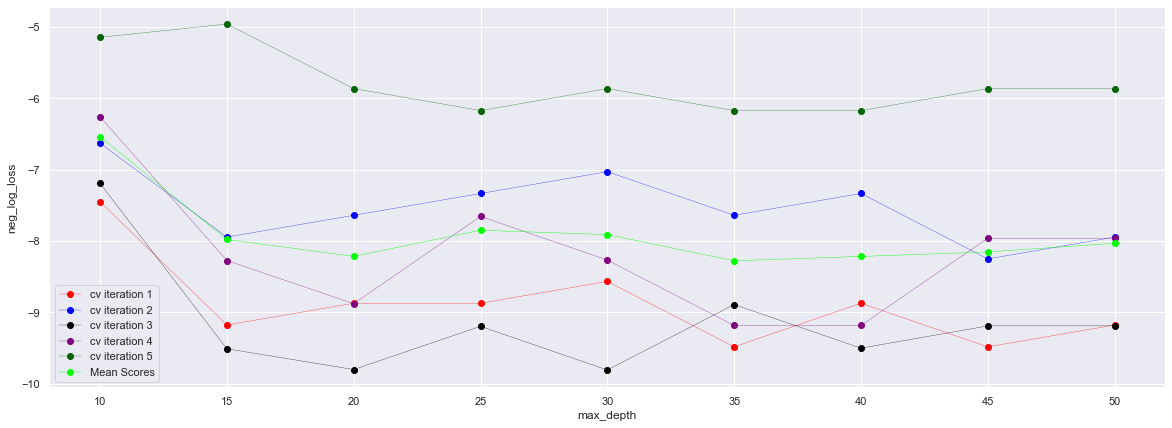

In [117]:
plt.figure(figsize=(20, 7))
# plt.set_xlim([0.9,1.])
plt.plot(params['max_depth'], tuned_report_log_loss['split0_test_score'], marker='o',c='red',linewidth=0.3 ,label='cv iteration 1')
plt.plot(params['max_depth'], tuned_report_log_loss['split1_test_score'], marker='o',c='blue',linewidth=0.3 ,label='cv iteration 2')
plt.plot(params['max_depth'], tuned_report_log_loss['split2_test_score'], marker='o',c='black',linewidth=0.3,label='cv iteration 3')
plt.plot(params['max_depth'], tuned_report_log_loss['split3_test_score'], marker='o',c='purple',linewidth=0.3,label='cv iteration 4')
plt.plot(params['max_depth'], tuned_report_log_loss['split4_test_score'], marker='o',c='darkgreen',linewidth=0.3, label='cv iteration 5')
plt.plot(params['max_depth'], tuned_report_log_loss['mean_test_score'], marker='o', c='lime', linewidth=0.4,  label='Mean Scores')

plt.xlabel('max_depth')
plt.ylabel('neg_log_loss')

plt.legend()

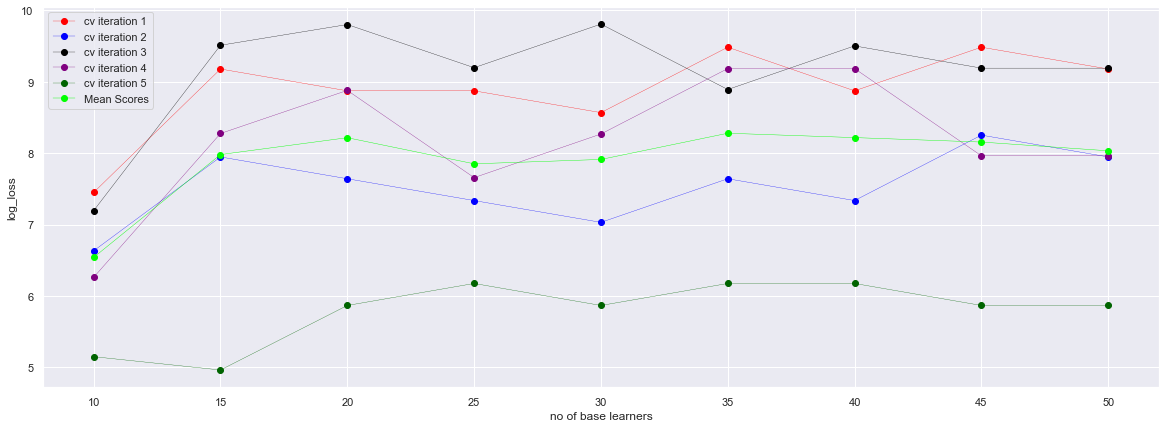

In [118]:
plt.figure(figsize=(20, 7))
# plt.set_xlim([0.9,1.])
plt.plot(params['max_depth'], tuned_report_log_loss['split0_test_score']*-1, marker='o',c='red',linewidth=0.3 ,label='cv iteration 1')
plt.plot(params['max_depth'], tuned_report_log_loss['split1_test_score']*-1, marker='o',c='blue',linewidth=0.3 ,label='cv iteration 2')
plt.plot(params['max_depth'], tuned_report_log_loss['split2_test_score']*-1, marker='o',c='black',linewidth=0.3,label='cv iteration 3')
plt.plot(params['max_depth'], tuned_report_log_loss['split3_test_score']*-1, marker='o',c='purple',linewidth=0.3,label='cv iteration 4')
plt.plot(params['max_depth'], tuned_report_log_loss['split4_test_score']*-1, marker='o',c='darkgreen',linewidth=0.3, label='cv iteration 5')
plt.plot(params['max_depth'], tuned_report_log_loss['mean_test_score']*-1, marker='o', c='lime', linewidth=0.4,  label='Mean Scores')

plt.xlabel('no of base learners')
plt.ylabel('log_loss')

plt.legend()

In [108]:
# Objective is to note the roc_auc scores at different values of hyperparameter(no of base learners) for the train set
# roc_auc_scores on cv set has already been noted from the above exercise

from tqdm import tqdm
train_set_log_loss = []

for each in tqdm(params['max_depth']):
    
    dtree = DecisionTreeClassifier(max_depth=each)
    dtree.fit(X_train, y_train)
    
    clf_isotonic = CalibratedClassifierCV(dtree, cv=10, method='sigmoid')
    clf_isotonic.fit(X_train, y_train)
    predicted_probabilites_per_class = clf_isotonic.predict_proba(X_train)
    
    train_set_log_loss.append(log_loss(y_train, predicted_probabilites_per_class))

100%|███████████████████████████████████████████| 9/9 [00:00<00:00, 15.81it/s]


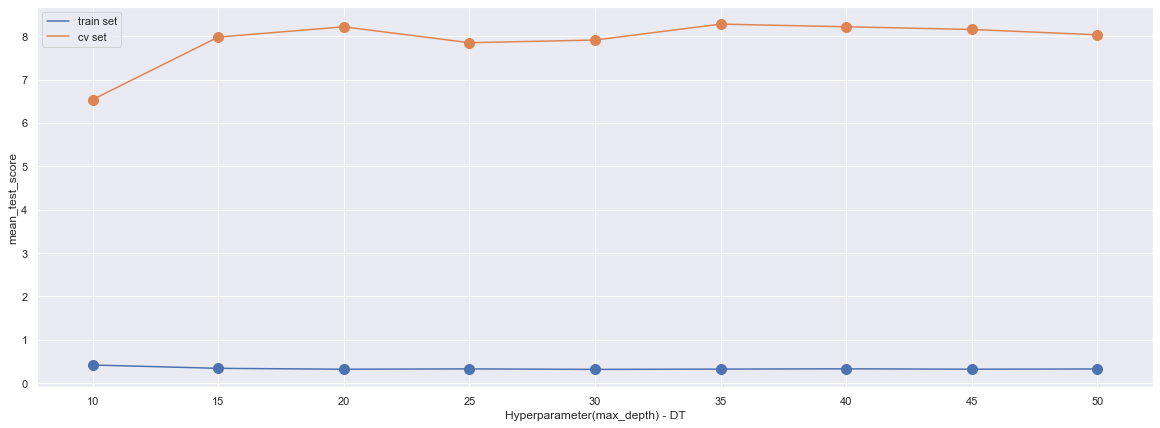

In [119]:
# PERFORMANCE AT SEVERAL VALUES OF HYPER PARAMETER ON TRAIN SET AND CV SET :
# PERFORMANCE METRIC IS ROC-AUC SCORE :

plt.figure(figsize=(20, 7))
# plt.annotate(params['max_depth'], train_set_roc_auc)
plt.xlabel('Hyperparameter(max_depth) - DT')
plt.scatter(params['max_depth'], train_set_log_loss, marker='o', s=100)
plt.scatter(params['max_depth'], np.abs(tuned_report_dtree['mean_test_score']), marker='o', s=100)
sns.lineplot(params['max_depth'], train_set_log_loss, label='train set')
sns.lineplot(params['max_depth'], np.abs(tuned_report_dtree['mean_test_score']), label='cv set')

*Inference :*

>+ We Observe that at max_depth=10, we get the least possible train error accompanied by least possible valdiation error AND
>+ As max_depth increases, then the train log loss error seems to decrement gradually but at parallel, validation error remains gradually more or less the same.
>+ At max_depth=50, we get least log loss on train but highest on cv set. meaning highly overfitting model.
>+ At max_depth= ~ 30, we get less magnitude of log loss on train but slight high on cv set pertaining to underfitting.

In [120]:
# At alpha=0.01, we get the maximum negativeLogLoss i.e. least +log_loss on both the train & cross validation sets.

dtree_tuned = DecisionTreeClassifier(max_depth=10)
dtree_tuned.fit(X_train, y_train)

# Calibrated classifiers on test dataset :

sig_clf_dtree = CalibratedClassifierCV(dtree_tuned, method="sigmoid") # sigmoid for lesss amount of datapoints
sig_clf_dtree.fit(X_train, y_train)
sig_clf_dtree_probs_test = sig_clf_lr.predict_proba(X_test)

print('Test Data Log loss tuned model :', log_loss(y_test, sig_clf_dtree_probs_test))

Test Data Log loss tuned model : 0.6263639465688362


In [89]:
print('Train Data Log loss tuned model :', log_loss(y_train, sig_clf_dtree.predict_proba(X_train_)))

Train Data Log loss tuned model : 0.6468627121482621


In [121]:
print('CV Data log loss tuned model :', 6.53918) # from the cv_results during random grid search

CV Data log loss tuned model : 6.53918


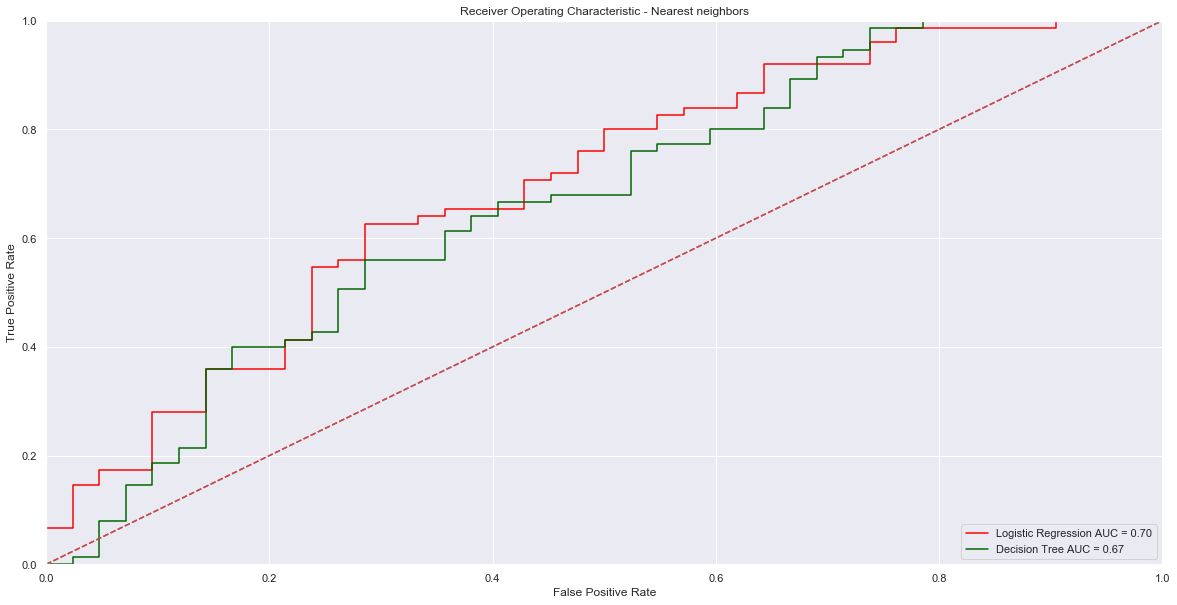

In [124]:
# Ref :https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

from sklearn.metrics import roc_curve, auc
sns.set()
probs = sig_clf_logistic_probs_test
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title('Receiver Operating Characteristic - Nearest neighbors')
plt.plot(fpr, tpr, 'red', label = 'Logistic Regression AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import roc_curve, auc
probs = sig_clf_dtree_probs_test
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)




plt.plot(fpr, tpr, 'darkgreen', label = 'Decision Tree AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### *End Note :*


+ Since we were short of data, hence we aren't resorting to fine tuning the classifiers or going for more advance ensembling model approach. Our only aim was to build a first cut comparable classifier model solutions and showcase the results on an entirely new form of dataset that has been harvested on our own and was fed into the *entire data science lifecycle chain* and present this as a simple form of a simplified case study. 


+ However these models as of now, are only the first cut model solutions though might or might not be the final cutting edge models as a solution to the business objective that we defined in this very notebook.